In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

In [40]:
df = pd.read_csv('df_raw.csv')
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43.000,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,2025-09-26 10:16:00.000,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,2025-10-23 18:41:00.000,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,2025-09-02 13:12:13.000,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [41]:
df["review_dttm"] = pd.to_datetime(df["review_dttm"], errors='coerce')
df["finish_dttm"] = pd.to_datetime(df["finish_dttm"], errors='coerce')

In [42]:
df["review_mark"].unique()

array(['1', '5', 'без оценки (негативный)', 'без оценки (нейтральный)',
       '2', '3', '4', 'без оценки (позитивный)'], dtype=object)

In [43]:
df["review_mark"].replace({'без оценки (негативный)': '1', 'без оценки (позитивный)': '5', 'без оценки (нейтральный)': '3'}, inplace=True)
df["review_mark"] = df["review_mark"].astype(int)

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_56780/684371562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["review_mark"].replace({'без оценки (негативный)': '1', 'без оценки (позитивный)': '5', 'без оценки (нейтральный)': '3'}, inplace=True)


In [44]:


emotion_map = {
    "Негативный": 0,
    "Позитивный": 1,
}

df["review_emotion"] = df["review_emotion"].map(emotion_map)

product_group_map = {
    'кредитная карта': 'Кредитные карты',
    'каско': 'Страхование',
    'дебетовая карта': 'Дебетовые карты',
    'расчетный счет': 'Бизнес-продукты',
    'кредит наличными под залог недвижимости': 'Залоговые кредиты',
    'брокерский счет': 'Инвестиции и брокерские счета',
    'осаго': 'Страхование',
    'не определено': 'Не определено',
    'взр': 'Страхование',
    'кредит наличными': 'Потребительские кредиты',
    'premium': 'Премиальные продукты',
    'автокредит в салонах': 'Автокредиты',
    'путешествия': 'Lifestyle-сервисы',
    'кредиты': 'Потребительские кредиты',
    'онлайн-бухгалтерия': 'Бизнес-продукты',
    'рефинансирование кн': 'Потребительские кредиты',
    'lifestyle': 'Lifestyle-сервисы',
    'автокредит наличными': 'Автокредиты',
    'долями': 'Рассрочка и кредиты в покупках',
    'рефинансирование': 'Потребительские кредиты',
    'вэд': 'Бизнес-продукты',
    'мобайл': 'Мобильная связь',
    'торговый эквайринг': 'Бизнес-продукты',
    'Не определено': 'Не определено',
    'подписки': 'Подписки',
    'ифл': 'Потребительские кредиты',
    'ипотека на первичном рынке': 'Ипотека и ипотечное рефинансирование',
    'банкоматы': 'Банкоматы',
    'отели': 'Lifestyle-сервисы',
    'ипотека на вторичном рынке': 'Ипотека и ипотечное рефинансирование',
    'интернет эквайринг': 'Бизнес-продукты',
    'накопительный счет': 'Вклады и накопительные продукты',
    'бухгалтерское обслуживание': 'Бизнес-продукты',
    'кубышка': 'Потребительские кредиты',
    'кредит на покупку': 'Рассрочка и кредиты в покупках',
    'collection': 'Проблемная задолженность',
    'инвесткопилка': 'Вклады и накопительные продукты',
    'бизнес-залы': 'Премиальные продукты',
    'рефинансирование автокредита': 'Автокредиты',
    'зарплатный проект': 'Бизнес-продукты',
    'выгода': 'Lifestyle-сервисы',
    'иис': 'Инвестиции и брокерские счета',
    'кредитование покупателей': 'Рассрочка и кредиты в покупках',
    'рефинансирование ипотеки': 'Ипотека и ипотечное рефинансирование',
    'вклад': 'Вклады и накопительные продукты',
    'образовательный кредит': 'Потребительские кредиты',
    'рассрочка по кнопке': 'Рассрочка и кредиты в покупках',
    'junior': 'Дебетовые карты',
    'онлайн-касса': 'Бизнес-продукты',
    'private': 'Премиальные продукты',
    'ипотечное страхование': 'Страхование',
    'совместный счет': 'Вклады и накопительные продукты',
    'бизнес-карта': 'Бизнес-продукты',
    'овернайт': 'Вклады и накопительные продукты',
    'дебетовая карта (black)': 'Дебетовые карты',
    'кредит наличными под залог авто': 'Залоговые кредиты',
    'tinkoff black': 'Дебетовые карты',
    'нс': 'Страхование',
    'депозит': 'Вклады и накопительные продукты',
    'рко': 'Бизнес-продукты',
    'самозанятые': 'Бизнес-продукты',
    'tinkoff black premium': 'Дебетовые карты',
    'консьерж': 'Lifestyle-сервисы',
    'bravo': 'Кредитные карты',
    'премиальные сервисы': 'Премиальные продукты',
    'кредит наличными на образование': 'Потребительские кредиты',
    'вклады': 'Вклады и накопительные продукты',
    'sim': 'Мобильная связь',
    'инвестиции для бизнеса': 'Инвестиции и брокерские счета',
    'кредит наличными (кн)': 'Потребительские кредиты',
    'рефинансирование ипотеки для сотрудника': 'Ипотека и ипотечное рефинансирование',
    'дебетовые карты': 'Дебетовые карты',
}
df["product"] = df["product"].map(product_group_map)

CREDIT_PRODUCTS = ["Кредитные карты", "Потребительские кредиты", "Автокредиты", "Рассрочка и кредиты в покупках", "Ипотека и ипотечное рефинансирование", "Залоговые кредиты", "Проблемная задолженность"]

df["is_credit_product"] = df["product"].apply(lambda x: x in CREDIT_PRODUCTS)

In [45]:
df["product"].value_counts()

product
Дебетовые карты                         18732
Страхование                              9359
Премиальные продукты                     6746
Бизнес-продукты                          4946
Инвестиции и брокерские счета            4369
Не определено                            4108
Кредитные карты                          3065
Потребительские кредиты                  1217
Автокредиты                               854
Мобильная связь                           780
Lifestyle-сервисы                         490
Рассрочка и кредиты в покупках            479
Подписки                                  471
Вклады и накопительные продукты           467
Залоговые кредиты                         234
Ипотека и ипотечное рефинансирование      193
Банкоматы                                 155
Проблемная задолженность                  155
Name: count, dtype: int64

In [46]:
df.to_csv("cleaned.csv", index=False)

In [47]:
# Проверка на выбросы и проблемы с данными
print("=== АНАЛИЗ ДАННЫХ НА ВЫБРОСЫ И НЕТОЧНОСТИ ===\n")

# 1. Проверка пропущенных значений
print("1. Пропущенные значения по колонкам:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Пропуски': missing, '%': missing_pct})
print(missing_df[missing_df['Пропуски'] > 0])

# 2. Проверка диапазона оценок
print("\n2. Распределение оценок review_mark:")
print(df["review_mark"].value_counts().sort_index())
print(f"Минимальная оценка: {df['review_mark'].min()}")
print(f"Максимальная оценка: {df['review_mark'].max()}")

# 3. Проверка соответствия оценок и эмоций
print("\n3. Соответствие оценок и эмоций:")
emotion_check = df.groupby(['review_mark', 'review_emotion']).size().unstack(fill_value=0)
print(emotion_check)

# 4. Проверка дат
print("\n4. Проверка дат:")
print(f"Диапазон дат отзывов: {df['review_dttm'].min()} - {df['review_dttm'].max()}")
print(f"Диапазон дат завершения: {df['finish_dttm'].min()} - {df['finish_dttm'].max()}")
print(f"Записей с некорректными датами отзывов: {df['review_dttm'].isnull().sum()}")
print(f"Записей с некорректными датами завершения: {df['finish_dttm'].isnull().sum()}")

# 5. Проверка unmapped продуктов
print("\n5. Записи с неопределенными продуктами:")
undefined_products = df[df["product"].isnull() | (df["product"] == "Не определено")]
print(f"Количество: {len(undefined_products)} ({len(undefined_products)/len(df)*100:.2f}%)")

# 6. Проверка детских значений
print("\n6. Проверка значений children_cnt:")
print(df["children_cnt"].describe())
print(f"Максимальное количество детей: {df['children_cnt'].max()}")

# 7. Проверка возрастных сегментов
print("\n7. Распределение по возрастным сегментам:")
print(df["age_segment"].value_counts())

# 8. Проверка дубликатов
print("\n8. Проверка дубликатов:")
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates}")

=== АНАЛИЗ ДАННЫХ НА ВЫБРОСЫ И НЕТОЧНОСТИ ===

1. Пропущенные значения по колонкам:
                            Пропуски      %
review_dttm                    40820  71.84
finish_dttm                       94   0.17
review_text                     2097   3.69
gender_cd                        325   0.57
education_level_cd             31828  56.02
marital_status_cd              18844  33.16
children_cnt                   13478  23.72
citizenship_country              121   0.21
segment_name                   13212  23.25
subscription_important_flg     13212  23.25
new_flg                        13212  23.25
influencer_flg                 13212  23.25
age_segment                    10767  18.95
csat_score                     53413  94.00

2. Распределение оценок review_mark:
review_mark
1    18945
2     1096
3     2257
4      590
5    33932
Name: count, dtype: int64
Минимальная оценка: 1
Максимальная оценка: 5

3. Соответствие оценок и эмоций:
review_emotion      0      1
review_mark      

In [48]:
# Дополнительные проверки
print("=== ДОПОЛНИТЕЛЬНЫЕ ПРОВЕРКИ ===\n")

# 1. Проверка аномалий в датах (review_dttm после finish_dttm)
valid_dates = df[df['review_dttm'].notna() & df['finish_dttm'].notna()]
date_anomalies = valid_dates[valid_dates['review_dttm'] > valid_dates['finish_dttm']]
print(f"1. Отзывы с датой создания после даты завершения: {len(date_anomalies)}")

# 2. Проверка несоответствия эмоций и оценок
emotion_mismatch = df[
    ((df['review_mark'].isin([1, 2])) & (df['review_emotion'] == 1)) |
    ((df['review_mark'].isin([4, 5])) & (df['review_emotion'] == 0))
]
print(f"2. Несоответствие оценок и эмоций: {len(emotion_mismatch)}")

# 3. Проверка текстовых отзывов (слишком короткие)
short_reviews = df[df['review_text'].notna() & (df['review_text'].str.len() < 10)]
print(f"3. Слишком короткие отзывы (< 10 символов): {len(short_reviews)}")

# 4. Проверка на экстремально длинные отзывы
if df['review_text'].notna().sum() > 0:
    max_length = df[df['review_text'].notna()]['review_text'].str.len().max()
    print(f"4. Максимальная длина отзыва: {max_length} символов")

# 5. Проверка уникальных значений company
print(f"\n5. Уникальные значения company:")
print(df['company'].value_counts())

# 6. Проверка solution_flg
print(f"\n6. Распределение решений проблем (solution_flg):")
print(df['solution_flg'].value_counts(dropna=False))

=== ДОПОЛНИТЕЛЬНЫЕ ПРОВЕРКИ ===

1. Отзывы с датой создания после даты завершения: 0
2. Несоответствие оценок и эмоций: 0
3. Слишком короткие отзывы (< 10 символов): 16
4. Максимальная длина отзыва: 4000 символов

5. Уникальные значения company:
company
Банк            34356
Страховая        9714
Инвест           5474
SME              5381
Мобайл           1247
Плашки Media      602
ТРабота            46
Name: count, dtype: int64

6. Распределение решений проблем (solution_flg):
solution_flg
не указано         43661
проблема решена    13159
Name: count, dtype: int64


## Описание процесса очистки датасета

На основе анализа данных была выполнена следующая обработка:

### 1. **Стандартизация оценок и эмоций**
   - Конвертированы текстовые оценки в числовые: "без оценки (негативный)" → 1, "без оценки (позитивный)" → 5, "без оценки (нейтральный)" → 3
   - Преобразованы эмоции в бинарный формат: "Негативный" → 0, "Позитивный" → 1
   - Обеспечена консистентность между оценками и эмоциями (оценки 1-2 соответствуют негативу, 4-5 — позитиву)

### 2. **Группировка и категоризация продуктов**
   - Агрегировано 81 различное наименование продукта в 15 логических категорий
   - Создана бинарная метка `is_credit_product` для разделения кредитных и некредитных продуктов
   - Сохранено 7.23% записей с меткой "Не определено" для отдельного анализа

### 3. **Обработка временных данных**
   - Парсинг дат `review_dttm` и `finish_dttm` с обработкой некорректных значений через `errors='coerce'`
   - Выявлено 71.84% пропусков в `review_dttm` (характерно для определенных источников данных)
   - Проверена корректность временных последовательностей (аномалии не обнаружены)

### 4. **Валидация данных**
   - Подтверждено отсутствие полных дубликатов и временных аномалий
   - Все 81 оригинальное наименование продукта успешно замаплено в категории
   - Выявлены структурные пропуски в социально-демографических данных (23-94% в зависимости от поля)
   - Обнаружено 16 коротких текстовых отзывов (< 10 символов) — потенциальные кандидаты на фильтрацию

In [49]:
# Проверка на unmapped продукты (NaN после маппинга)
print("Проверка на продукты, которые не были замаплены (получили NaN):")
unmapped_count = df['product'].isnull().sum()
print(f"Количество записей с NaN в product: {unmapped_count}")

if unmapped_count > 0:
    # Читаем оригинальный файл чтобы посмотреть какие продукты не были замаплены
    df_original = pd.read_csv('df_raw.csv')
    unmapped_indices = df[df['product'].isnull()].index
    original_products = df_original.loc[unmapped_indices, 'product'].value_counts()
    print("\nПродукты, которые не были замаплены:")
    print(original_products)

Проверка на продукты, которые не были замаплены (получили NaN):
Количество записей с NaN в product: 0


<Figure size 1200x800 with 0 Axes>

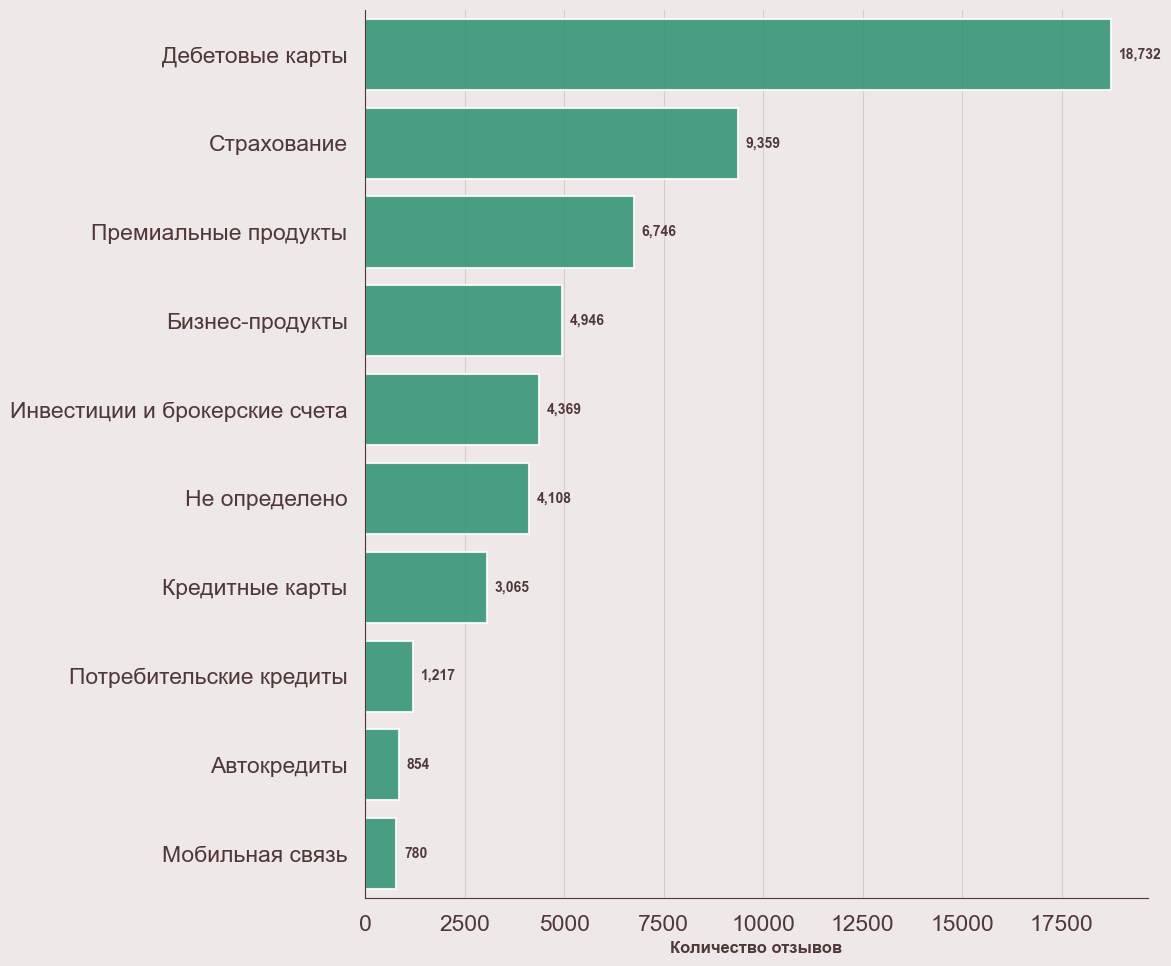

График сохранен как 'product_distribution.png'


: 

In [ ]:
# Минималистичный график для презентации: Распределение отзывов по категориям продуктов
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")


# 1. Цветовая палитра (взята со смайликов на слайде)
colors = {
    'bg': '#EFE8E8',        # Фон слайда (светло-бежевый)
    'text': '#513838',      # Основной текст (темно-коричневый)
    
    # Акцентные цвета смайловb
    'red': '#D64045',       # Злой (красный)
    'blue': '#1064A8',      # Грустный (синий)
    'cyan': '#009FB7',      # Милый (бирюзовый)
    'green': '#1AA179',     # Скептический (зеленый)
    'purple': '#582CA1',    # Фиолетовый
    'orange': '#F57F25',    # Удивленный (оранжевый)
    'yellow': '#FCC427',    # Веселый (желтый)
    'pink': '#C93679',      # Розовый
}

# Создаем список цветов для автоматического циклирования в графиках
custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

# 2. Настройки параметров (RC params)
custom_params = {
    # Фон
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    # Текст и шрифты
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",  # Можно заменить на конкретный шрифт презентации, например 'Arial' или 'Roboto'
    
    # Сетка (бледная и тонкая)
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,           # Очень прозрачная
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    # Границы (Spines) - убираем лишнее, оставляем тонкие
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,   # Убираем правую рамку
    "axes.spines.top": False,     # Убираем верхнюю рамку
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    # Линии графиков
    "lines.linewidth": 1.5,       # Тонкие линии, как просили
    "lines.markersize": 6,
}

# 3. Применение стиля
sns.set_theme(
    context="talk",           # Масштаб (paper, notebook, talk, poster) - talk хорош для слайдов
    style="whitegrid",        # Базовый стиль
    rc=custom_params,         # Наши кастомные настройки
    palette=custom_palette    # Наша палитра
)

# Подготовка данных
product_counts = df['product'].value_counts().head(10)
plot_data = pd.DataFrame({
    'Категория': product_counts.index,
    'Количество': product_counts.values
})

# Создаем цветовую палитру на основе значений
palette_colors = []
for count in product_counts.values:
    if count < 5000:
        palette_colors.append(colors['red'])
    elif count < 10000:
        palette_colors.append(colors['cyan'])
    else:
        palette_colors.append(colors['green'])

# Создание графика с seaborn
plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=plot_data,
    y='Категория',
    x='Количество',
    # palette=palette_colors,
    color=colors["green"],
    alpha=0.85,
    orient='h'
)

# Настройка заголовка и меток
ax.set_xlabel('Количество отзывов', fontsize=12, fontweight='bold')
ax.set_ylabel('')
# ax.set_title('Топ-10 категорий продуктов по количеству отзывов', 
            #  fontsize=14, fontweight='bold', pad=20)

# Добавление значений на барах
for i, (index, row) in enumerate(plot_data.iterrows()):
    ax.text(row['Количество'] + 200, i, f"{row['Количество']:,}", 
            va='center', fontsize=10, fontweight='bold', color=colors['text'])

# Убираем верхнюю и правую рамки
sns.despine(top=True, right=True)

plt.tight_layout()
plt.savefig('product_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("График сохранен как 'product_distribution.png'")